In [1]:
from pygeotools.lib import geolib,iolib,warplib
import numpy as np
import os,sys,glob,shutil
import matplotlib.pyplot as plt
from imview import pltlib


Bad key "text.kerning_factor" on line 4 in
/nobackup/sbhusha1/sw/miniconda3/envs/bhushan_PY3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
img_fn = '/nobackupp2/sbhusha1/vmap_comparison_testing/LC08_L1TP_062017_20180903_20180912_01_T1_B8_s.TIF'
img_ds = iolib.fn_getds(img_fn)
img_ma = iolib.ds_getma(img_ds)

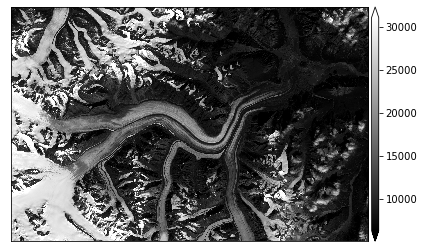

In [3]:
f,ax = plt.subplots()
pltlib.iv(img_ma,ax=ax,cmap='gray')

In [4]:
img_ds.RasterXSize

3780

In [5]:
img_ma.shape

(2480, 3780)

In [6]:
ny,nx = img_ma.shape

#### divide shifts incremently into blocks of 500 * 500 pixels

In [7]:
shift_arx = np.zeros((ny,nx))

In [20]:
shift_arx[:,:500] = 0.1

In [21]:
shift_arx

array([[0.1, 0.1, 0.1, ..., 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, ..., 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, ..., 0. , 0. , 0. ],
       ...,
       [0.1, 0.1, 0.1, ..., 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, ..., 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, ..., 0. , 0. , 0. ]])

In [8]:
shift_arx[:,500:1000] = 0.2

In [23]:
shift_arx

array([[0.1, 0.1, 0.1, ..., 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, ..., 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, ..., 0. , 0. , 0. ],
       ...,
       [0.1, 0.1, 0.1, ..., 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, ..., 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, ..., 0. , 0. , 0. ]])

In [24]:
shift_arx[:,1000:1500] = 0.3

In [9]:
shift_arx[:,1500:2000] = 0.4
shift_arx[:,2000:2500] = 0.5
shift_arx[:,2500:3000] = 0.6
shift_arx[:,3000:3500] = 0.7
shift_arx[:,3500:] = 0.8

In [12]:
img_ma

masked_array(
  data=[[ 8560,  8139,  8466, ..., 14573, 14907, 15497],
        [ 8391,  8688,  8942, ..., 15646, 15720, 15907],
        [ 8177,  8710,  8399, ..., 16525, 16248, 16141],
        ...,
        [11728, 12089, 12016, ..., 11333, 11253, 10996],
        [12039, 12057, 11892, ..., 11403, 11373, 11212],
        [12347, 13167, 12205, ..., 11359, 11362, 11290]],
  mask=False,
  fill_value=0,
  dtype=uint16)

In [26]:
shift_arx

array([[0.1, 0.1, 0.1, ..., 0.8, 0.8, 0.8],
       [0.1, 0.1, 0.1, ..., 0.8, 0.8, 0.8],
       [0.1, 0.1, 0.1, ..., 0.8, 0.8, 0.8],
       ...,
       [0.1, 0.1, 0.1, ..., 0.8, 0.8, 0.8],
       [0.1, 0.1, 0.1, ..., 0.8, 0.8, 0.8],
       [0.1, 0.1, 0.1, ..., 0.8, 0.8, 0.8]])

### now create a similar array with shift in y direction

In [10]:
shift_ary = np.zeros((ny,nx))

In [68]:
shift_ary[:500,] = -0.1
shift_ary

array([[-0.1, -0.1, -0.1, ..., -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, ..., -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, ..., -0.1, -0.1, -0.1],
       ...,
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5]])

In [69]:
shift_ary[500:1000,:] = -0.2
shift_ary[1000:1500,:] = -0.3
shift_ary[1500:2000,:] = -0.4
shift_ary[2000:,:] = -0.5


In [70]:
shift_ary

array([[-0.1, -0.1, -0.1, ..., -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, ..., -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, ..., -0.1, -0.1, -0.1],
       ...,
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5]])

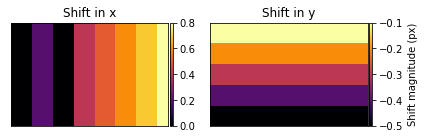

In [72]:
f,ax = plt.subplots(1,2)
pltlib.iv(shift_arx,ax=ax[0],title='Shift in x',cmap='inferno')
pltlib.iv(shift_ary,ax=ax[1],title='Shift in y',cmap='inferno',label='Shift magnitude (px)')
plt.tight_layout()

### Perform the pixel shifting
###### https://stackoverflow.com/questions/56143632/how-to-estimate-a-sub-pixel-shift-between-images-with-non-uniform-translation-ro

In [17]:
from scipy import interpolate

In [73]:
## get initial coordinate position using meshgrid
nx_val = np.arange(0,nx)
ny_val = np.arange(0,ny)

In [74]:
img_ma.shape

(2480, 3780)

In [75]:
NX,NY = np.meshgrid(nx_val,ny_val)

In [76]:
NX.shape

(2480, 3780)

In [77]:
NY.shape

(2480, 3780)

In [78]:
NX_shift = NX + shift_arx
NY_shift = NY + shift_ary

In [119]:
import scipy.ndimage

In [103]:
yx = np.array([np.ma.array(NY_shift).compressed(),np.ma.array(NX_shift).compressed()])

In [104]:
#h2_samp = scipy.ndimage.map_coordinates(h, yx, order=1,mode='nearest')
shift_samp = scipy.ndimage.map_coordinates(img_ma,yx,order=1,mode='nearest')

In [105]:
shift_samp

array([ 8560,  8139,  8466, ..., 11370, 11274, 11251], dtype=uint16)

In [102]:
np.ma.array(NY_shift).compressed()

array([-1.0000e-01, -1.0000e-01, -1.0000e-01, ...,  2.4785e+03,
        2.4785e+03,  2.4785e+03])

In [106]:
shift_img = np.zeros_like(img_ma)
shift_img[np.ma.array(NY).compressed(),np.ma.array(NX).compressed()] = shift_samp

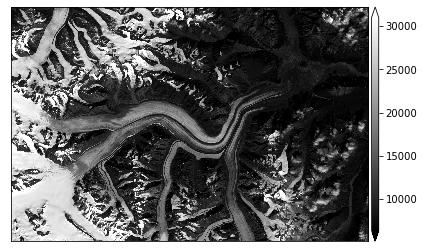

In [107]:
f,ax = plt.subplots()
pltlib.iv(np.ma.fix_invalid(shift_img),ax=ax,cmap='gray')

In [111]:
outfn = os.path.splitext(img_fn)[0]+'_synthetic_shift.tif'
iolib.writeGTiff(shift_img,outfn,src_ds=img_ds)

## Run correlator and check disparity

In [113]:
outdisp_fn = '/nobackupp2/sbhusha1/vmap_comparison_testing/LC08_L1TP_062017_20180903_20180912_01_T1_B8_s__LC08_L1TP_062017_20180903_20180912_01_T1_B8_s_synthetic_shift_vmap_minm_35px_spm1/vmap-F.tif'
dx,dy = [iolib.fn_getma(outdisp_fn,x) for x in range(1,3)]

In [115]:
%matplotlib notebook

In [117]:
#Looks like i compared in reverse direction, so multiplying by -1

<IPython.core.display.Javascript object>


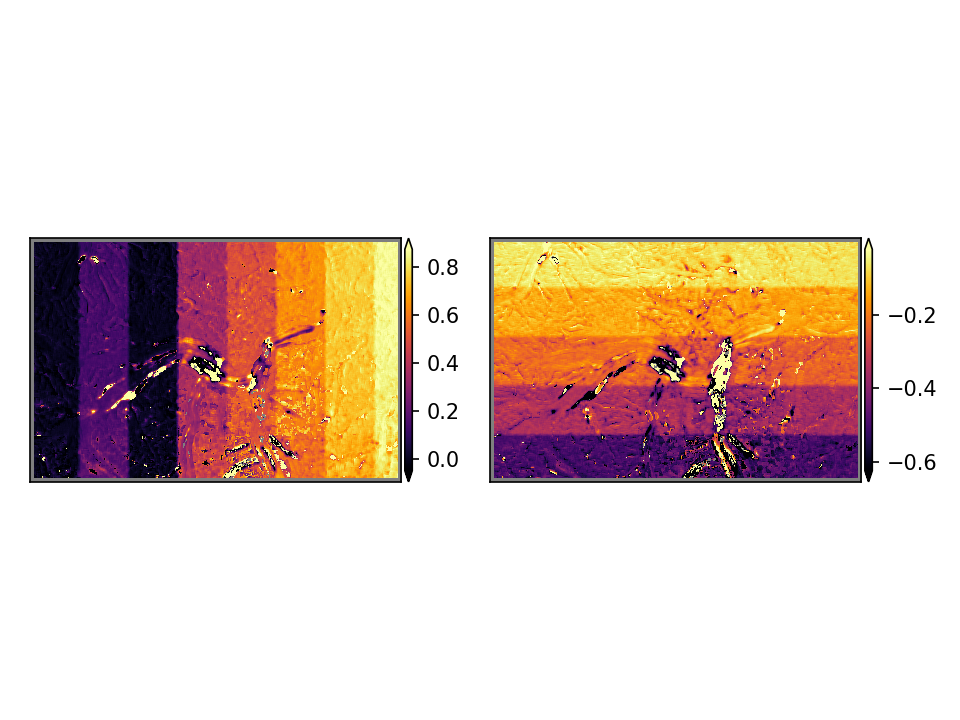

In [118]:
f,ax = plt.subplots(1,2)
pltlib.iv(-1*dx,cmap='inferno',ax=ax[0])
pltlib.iv(-1*dy,cmap='inferno',ax=ax[1])